In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
jax.config.update('jax_platform_name', 'cpu')

In [3]:
from entot.data.data import create_gaussians, create_gaussian_split
from entot.models.models import DiscreteOTModel, SeguyModel
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp

In [4]:
n_x = 100
n_y = 100
x = np.linspace(-0.3, 1.2, n_x)
y = np.linspace(-0.5, 0.5, n_y)
xx, yy = np.meshgrid(x,y)

x_fl = xx.flatten()
y_fl = yy.flatten()

concat = jnp.transpose(jnp.concatenate((jnp.atleast_2d(x_fl), jnp.atleast_2d(y_fl)), axis=0))
concat.shape

(10000, 2)

# Dataset 1

In [5]:
source, target = create_gaussians(1000, 1000, var_source=0.2, var_target=0.2)

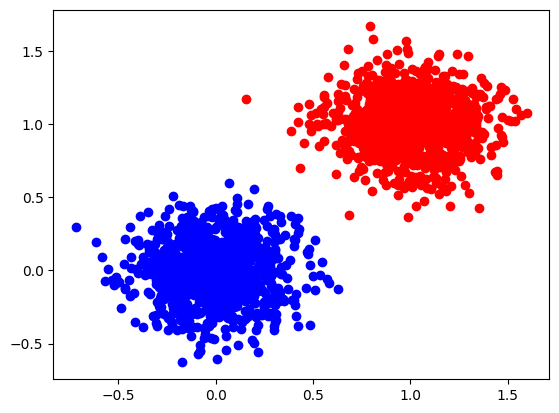

In [6]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [9]:
dot = DiscreteOTModel(epsilon=1e-2)
dot(source, target)
dot_transported = dot.transport()

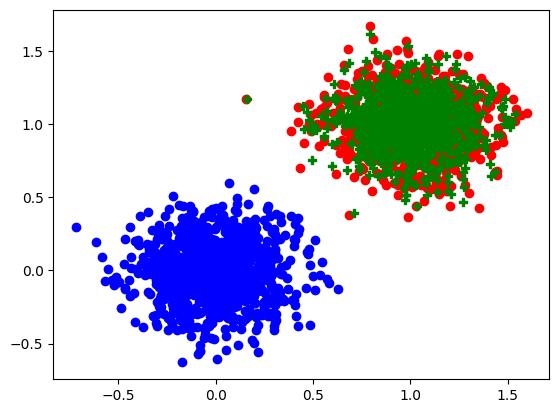

In [10]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green", marker="P")

In [11]:
hessian_source = dot.get_hessians_f(source)
hessian_target = dot.get_hessians_g(target)

In [12]:
hessian_source.shape

(1000, 2, 2)

In [13]:
traces_source = jnp.ones((len(source),)) - jnp.trace(hessian_source, axis1=1, axis2=2)
traces_target = jnp.ones((len(target),)) - jnp.trace(hessian_target, axis1=1, axis2=2)
print(jnp.sum(np.asarray(traces_source < 0)), jnp.sum(np.asarray(traces_target < 0)))

55 38


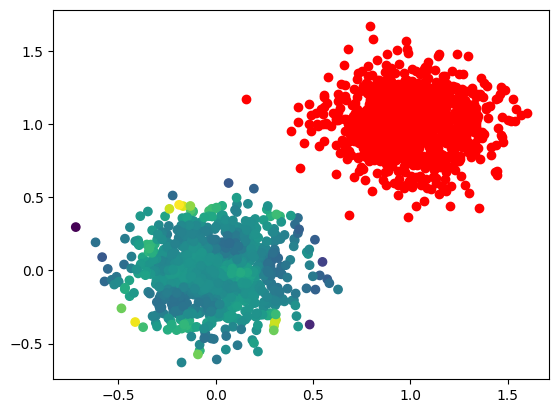

In [14]:
plt.scatter(source[:,0], source[:,1], c=traces_source)
plt.scatter(target[:, 0], target[:, 1], color="red")

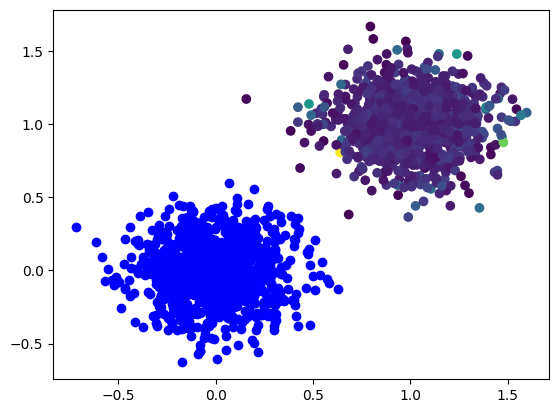

In [18]:
plt.scatter(source[:,0], source[:,1], color='blue')
plt.scatter(target[:, 0], target[:, 1], c=traces_target)

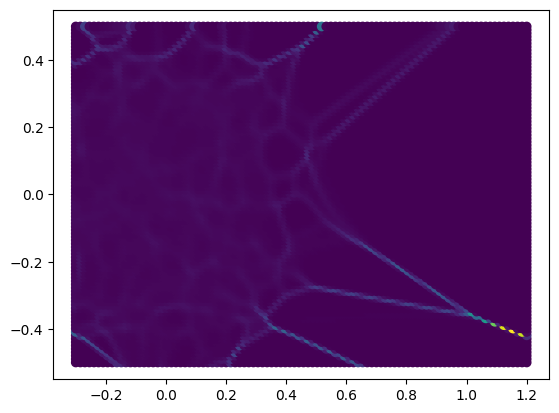

In [19]:
hessian_f = dot.get_hessians_f(concat)

traces = jnp.ones((len(concat),)) - jnp.trace(hessian_f, axis1=1, axis2=2)

plt.scatter(concat[:,0], concat[:,1], c=traces)

# Dataset 2

In [20]:
source, target = create_gaussian_split(1000, 900, var_source=0.04, var_target=0.04, seed=1)

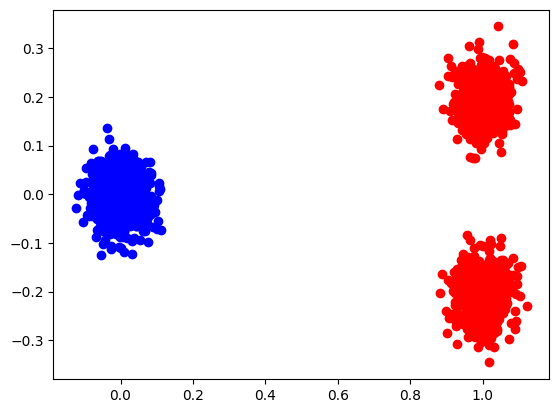

In [21]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")

In [31]:
dot = DiscreteOTModel(epsilon=1e-3)
dot(source, target)
dot_transported = dot.transport()

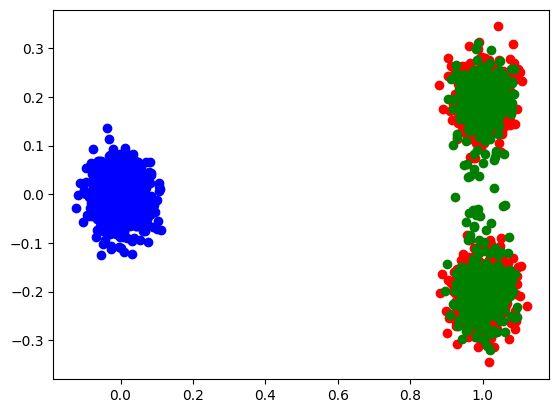

In [32]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.scatter(dot_transported[:, 0], dot_transported[:, 1], color="green")

In [33]:
hessian_source = dot.get_hessians_f(source)
hessian_target = dot.get_hessians_g(target)

In [43]:
traces_source = jnp.ones((len(source),)) - jnp.trace(hessian_source, axis1=1, axis2=2)
traces_target = jnp.ones((len(target),)) - jnp.trace(hessian_target, axis1=1, axis2=2)
print(jnp.sum(np.asarray(traces_source < 0)), jnp.sum(np.asarray(traces_target < 0)))

1 834


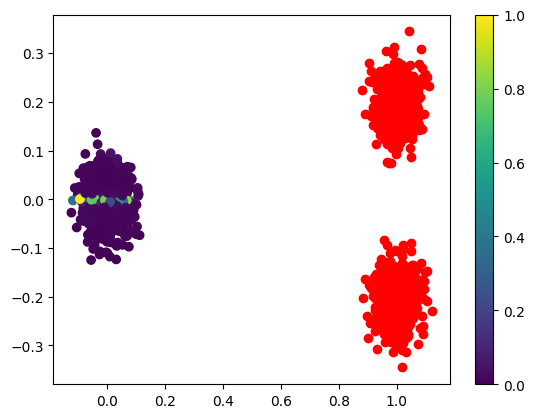

In [46]:
plt.scatter(source[:,0], source[:,1], c=traces_source)
plt.scatter(target[:, 0], target[:, 1], color="red")
plt.colorbar()

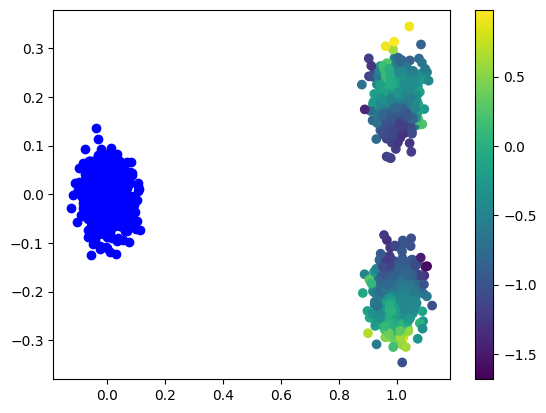

In [48]:
plt.scatter(source[:,0], source[:,1], color="blue")
plt.scatter(target[:, 0], target[:, 1], c=traces_target)
plt.colorbar()

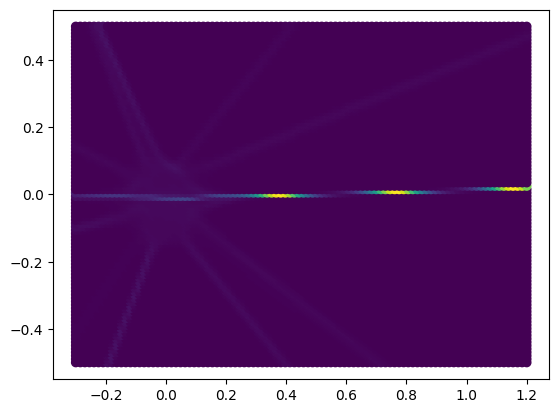

In [50]:
hessian_concat = dot.get_hessians_f(concat)
traces = jnp.ones((len(concat),)) - jnp.trace(hessian_concat, axis1=1, axis2=2)
plt.scatter(concat[:,0], concat[:,1], c=traces)
